In [1]:
import pandas as pd 
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
searched_file_format = 'transaction_data.csv'
updated_file_format = 'transaction_data_updated.csv'
current_file_path = os.getcwd()

In [69]:
# perform .csv file search in directory
for file in os.listdir(current_file_path):
    if searched_file_format in file:
        file_path = os.path.join(current_file_path, file)
    elif updated_file_format in file:
        updated_file_path = os.path.join(current_file_path, file)

### Загрузка датасета

In [40]:
transaction_data_df = pd.read_csv(file_path, encoding='windows-1251', parse_dates=['date'])

In [41]:
transaction_data_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


##### Осуществляем проверку размера таблицы, типов содержащихся переменных, число пропущенных значений и вывод описательной статистики:

In [42]:
transaction_data_df.shape

(5315, 3)

In [43]:
transaction_data_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [44]:
transaction_data_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [46]:
transaction_data_df.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


### Анализируем виды результатов в transaction. Построим график

In [50]:
transaction_data_df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

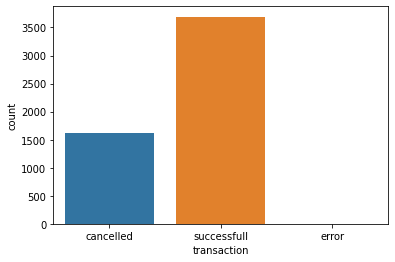

In [51]:
sns.countplot(x='transaction', data=transaction_data_df)

### Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

In [59]:
transaction_nums_df = transaction_data_df.query("transaction == 'successfull'") \
                                            .groupby('name', as_index=False) \
                                            .agg({'transaction': 'count'}) \
                                            .sort_values('transaction', ascending=False)
transaction_nums_df.head()

,name,transaction
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


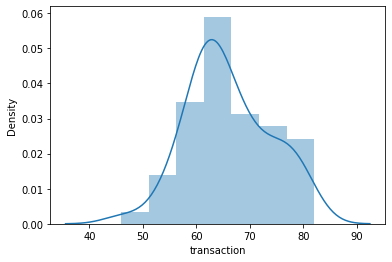

In [65]:
sns.distplot(transaction_nums_df.transaction)

In [67]:
transaction_nums_df.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


### Загружаем обновленный файл с данными

In [102]:
transaction_data_updated = pd.read_csv(updated_file_path, encoding='windows-1251', parse_dates=['date'])

In [103]:
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [104]:
transaction_data_updated.isna().sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

In [105]:
transaction_data_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [100]:
# Пробное создание колонки с минутами из файла типа datetime
transaction_data_updated = transaction_data_updated.assign(minutes_2 = transaction_data_updated.date.dt.minute) 
transaction_data_updated.head()

,date,name,transaction,minute,minutes_2
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


### Создание сводной таблицы, колнки - name, строки - minute, значения - transaction

In [108]:
user_vs_minute_pivot = transaction_data_updated.groupby(['minute', 'name'], as_index=False) \
                                                .agg({'transaction': 'count'}) \
                                                .pivot(index='minute', columns='name', values='transaction')\
                                                .fillna(0)


In [109]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


### Создадим колонку со значением времени в минутах, прошедших сначала дня

In [118]:
transaction_data_updated = transaction_data_updated.assign(
    true_minute = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour * 60
) 

In [131]:
transaction_data_updated.sort_values('date', ascending=True)

,date,name,transaction,minute,true_minute
4451,2020-03-02 00:00:00,Masha_Lesnova,successfull,0,0
4008,2020-03-02 00:00:01,Lolita_Ivanova,cancelled,0,0
2869,2020-03-02 00:00:01,Lolita_Smirnova,successfull,0,0
2171,2020-03-02 00:00:01,Ekaterina_Polyanova,cancelled,0,0
4208,2020-03-02 00:00:02,Lolita_Polyanova,successfull,0,0
...,...,...,...,...,...
2954,2020-03-02 01:29:00,Vasilisa_Polyanova,cancelled,29,89
873,2020-03-02 01:29:01,Irina_Polyanova,successfull,29,89
4358,2020-03-02 01:29:02,Svetlana_Lesnova,successfull,29,89
1025,2020-03-02 01:29:05,Irina_Smirnova,successfull,29,89


In [132]:
transactions_vs_time = transaction_data_updated.groupby(['date', 'true_minute'], as_index=False) \
                                                .agg({'transaction': 'count'}) \
                                                .rename(columns={'transaction': 'transaction_number'})

In [133]:
transactions_vs_time

,date,true_minute,transaction_number
0,2020-03-02 00:00:00,0,1
1,2020-03-02 00:00:01,0,3
2,2020-03-02 00:00:02,0,1
3,2020-03-02 00:00:03,0,2
4,2020-03-02 00:00:04,0,2
...,...,...,...
3368,2020-03-02 01:28:58,88,2
3369,2020-03-02 01:29:00,89,1
3370,2020-03-02 01:29:01,89,1
3371,2020-03-02 01:29:02,89,1


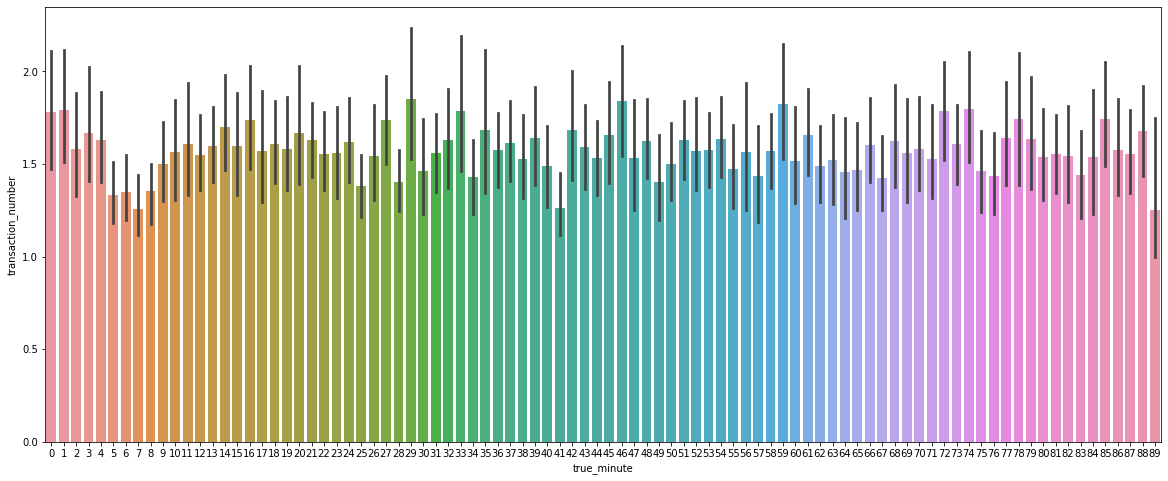

In [139]:
plt.figure(figsize=(20,8))
sns.barplot(x='true_minute', y='transaction_number', data=transactions_vs_time)